<a href="https://colab.research.google.com/github/swapnil-mergal/HEALTH-INSURANCE-CROSS-SELL-PREDICTION-PROJECT/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEALTH INSURANCE CROSS SELL PREDICTION

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Loading Dataset

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#reading dataset
df1=pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.CSV')
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [86]:
#Descriptive statistics
df1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [87]:
#Shape of data
df1.shape

(381109, 12)

In [88]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [89]:
#checking missing values
df1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* Our dataset have
 no null value.

In [90]:
#Check for duplicated values
display(df1.drop_duplicates())

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#Data Visualization

# Univariate Analysis

<Axes: xlabel='Response', ylabel='count'>

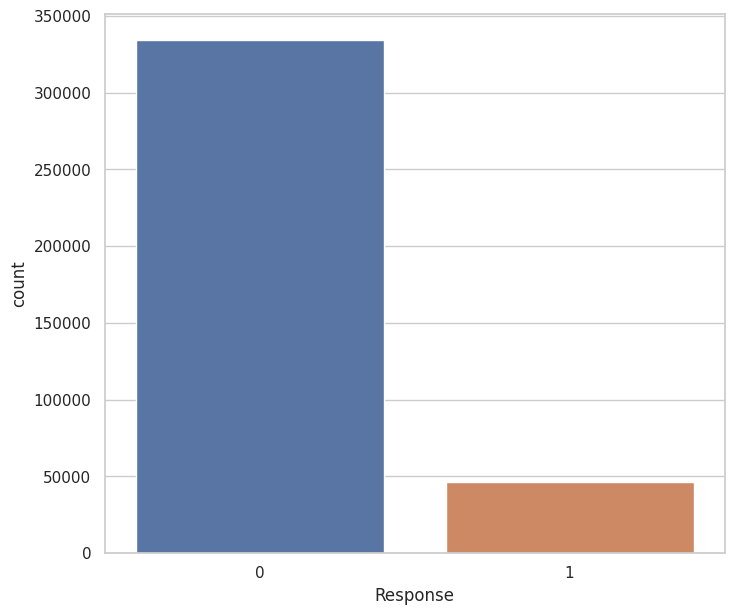

In [92]:
#Dependent variable 'Response'
plt.figure(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x=df1['Response'],data=df1)

* From above fig we can see that the data is highly imbalanced.

<Axes: xlabel='Age', ylabel='count'>

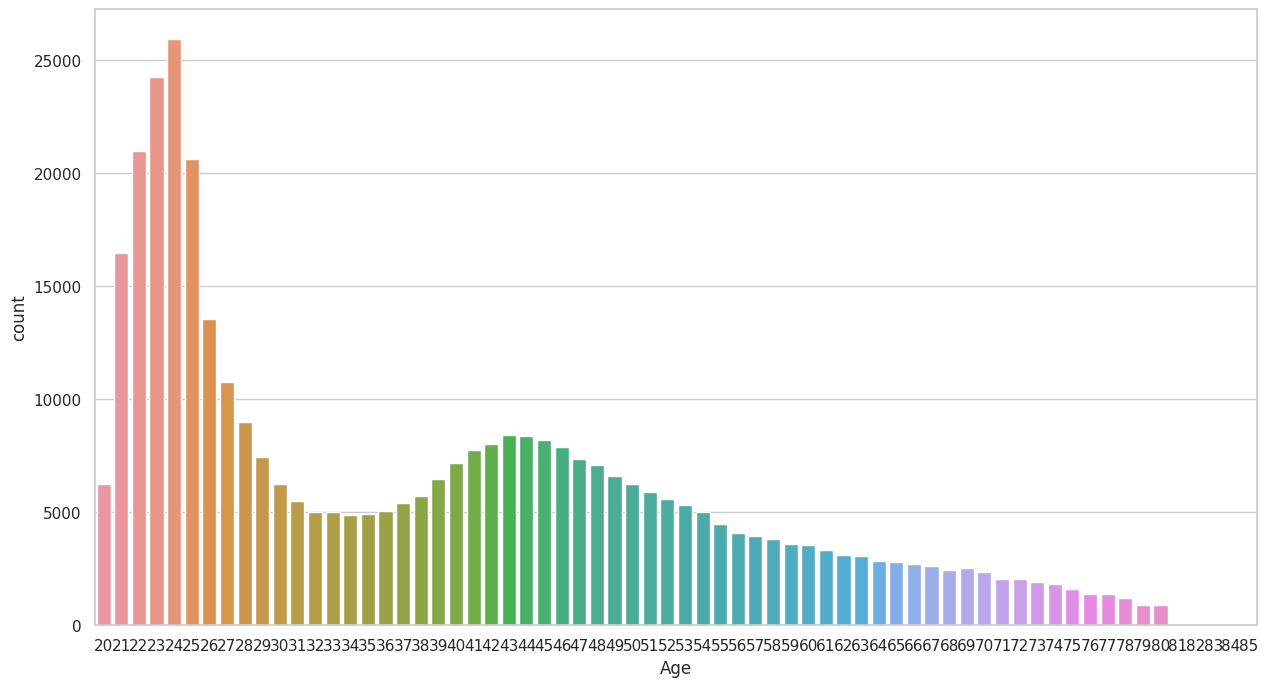

In [93]:
#Distribution of Age
plt.figure(figsize=(15,8))
sns.countplot(x=df1['Age'],data=df1)

* From the above distribution of age we can see that most of the customers age is between 21 to 25 years.There are few Customers above the age of 60 years.

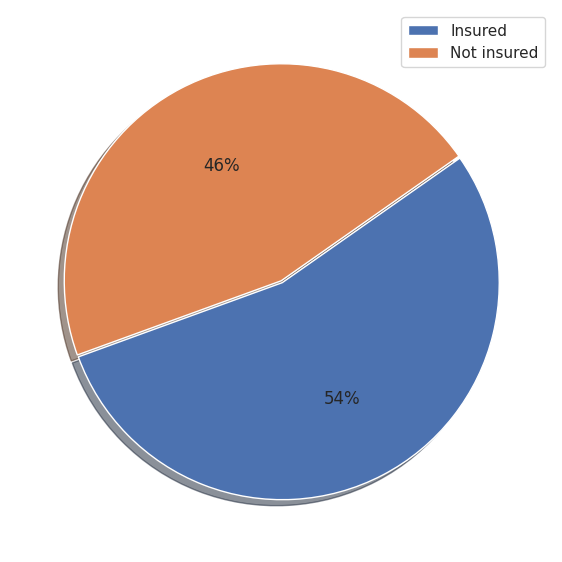

In [94]:

plt.figure(figsize=(7,9))
plt.pie(df1['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()


* 54% customer are previously insured ahe 46% customer are are not insured yet.
* Customer who are not perviosly insured are likely to be inetrested.

<ipython-input-95-dd3e0e3f9923>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, color='purple')


<Axes: xlabel='Annual_Premium', ylabel='Density'>

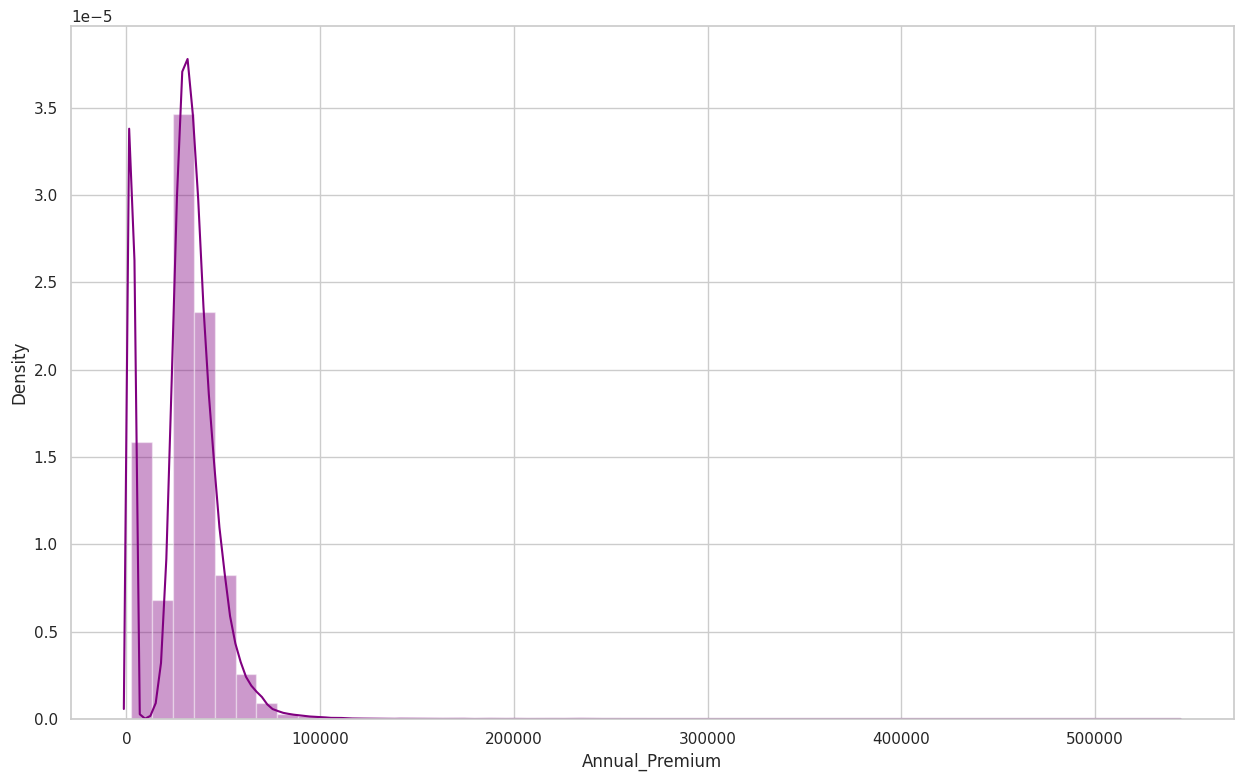

In [95]:
plt.figure(figsize=(15,9))
a=df1['Annual_Premium']
sns.distplot(a, color='purple')

* From the distribution plot we can infer that the annual premimum variable is right skewed

<Axes: >

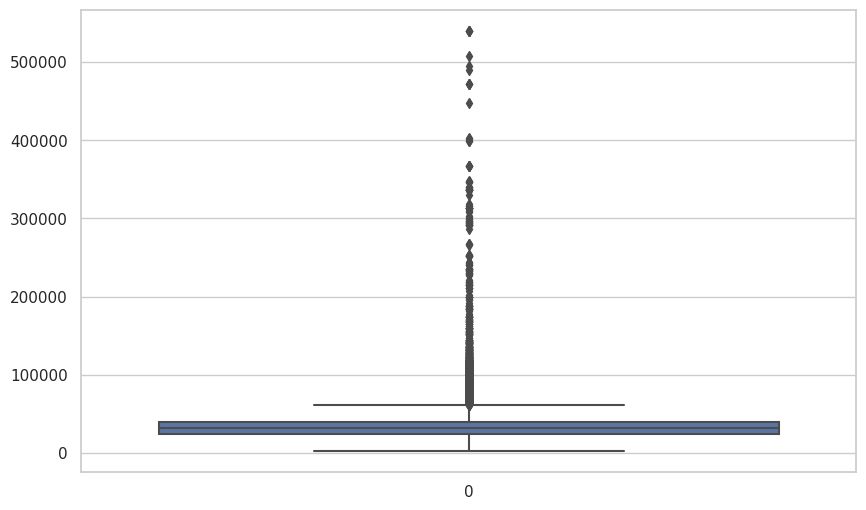

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Annual_Premium'])

*  For the boxplot above we can see that there's a lot of outliers in the annual premium.

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

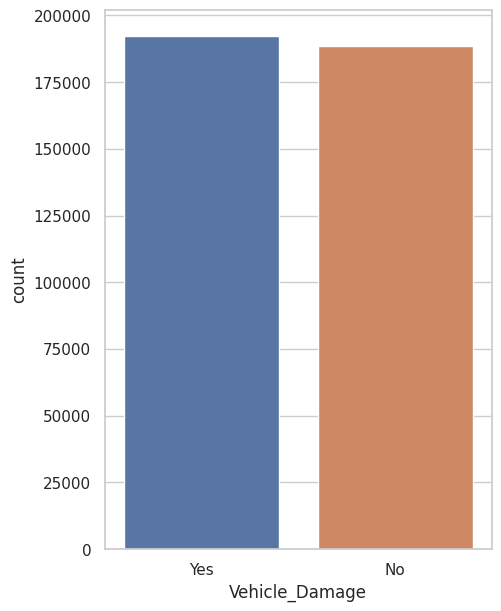

In [97]:
plt.figure(figsize=(5,7))
sns.countplot(x=df1['Vehicle_Damage'])

* Customers with Vehicle_Damage are likely to buy insurance

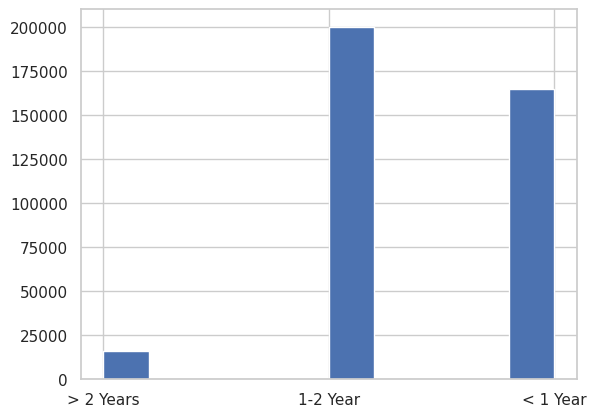

In [98]:
df1['Vehicle_Age'].hist();

* From the above plot we can see that most of the people are having vehicle age between 1 or 2 years and very few people are having vehicle age more than 2 years.

#Bivariate analysis

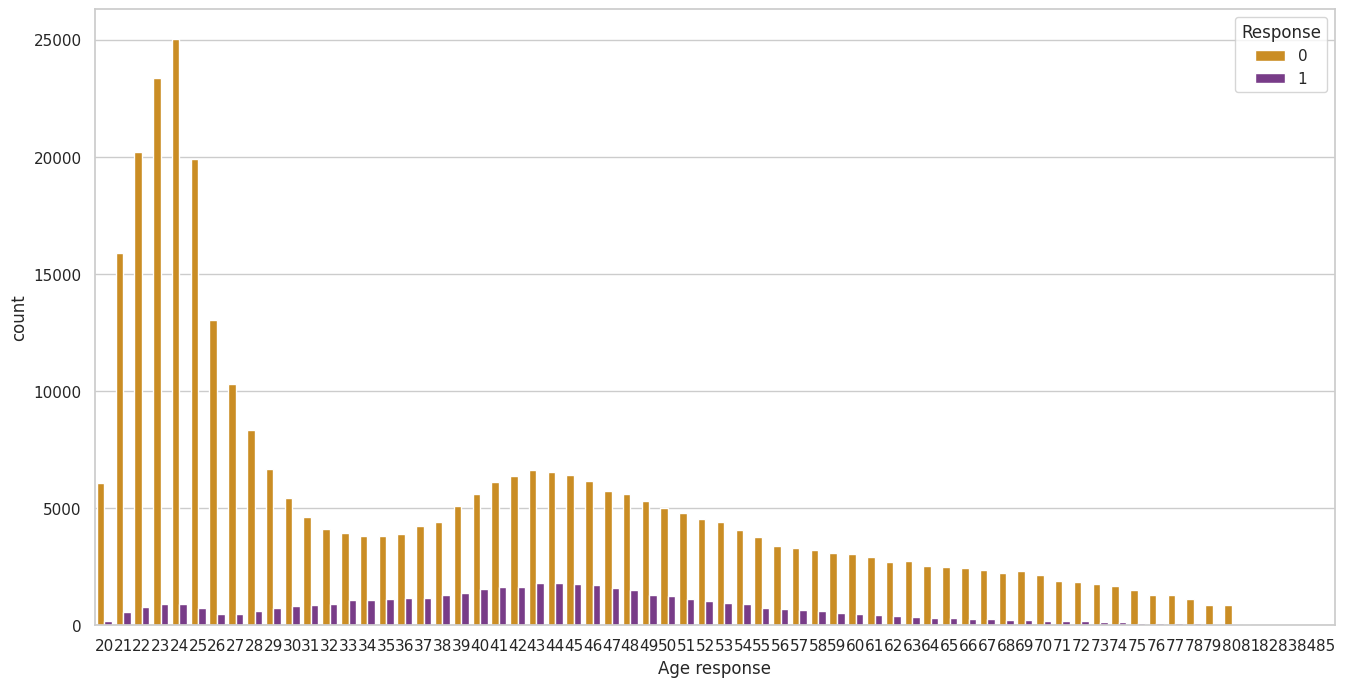

In [99]:
#Age VS Response
plt.figure(figsize=(16,8))
sns.countplot(data=df1, x='Age',hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

* People ages between from 31 to 50 are more likely to respond.
*  while Young people below 30 are not interested in vehicle insurance.


<Axes: xlabel='Gender'>

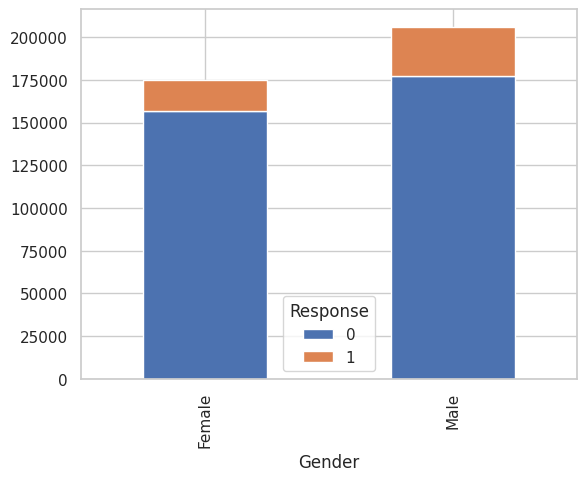

In [100]:
#Gender vs Response
df1.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

* Male category is slightly greater than that of female and chances of buying the insurance is also little high

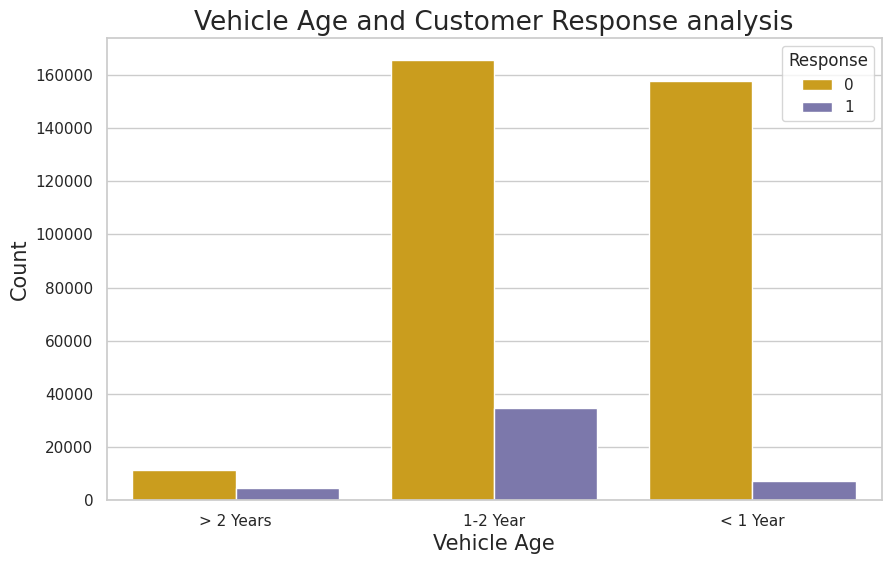

In [101]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df1, x = 'Vehicle_Age', hue = 'Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

<Axes: xlabel='Response', ylabel='Annual_Premium'>

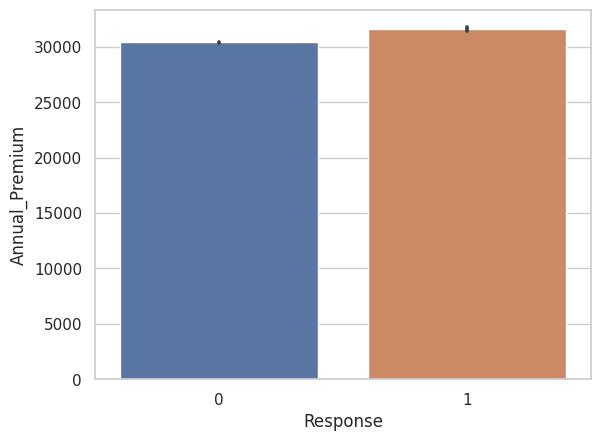

In [102]:
sns.barplot(x = 'Response', y ='Annual_Premium', data = df1)

*  People who response have slightly higher annual premium

<ipython-input-103-eaf64a78e3d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot = True)


<Axes: >

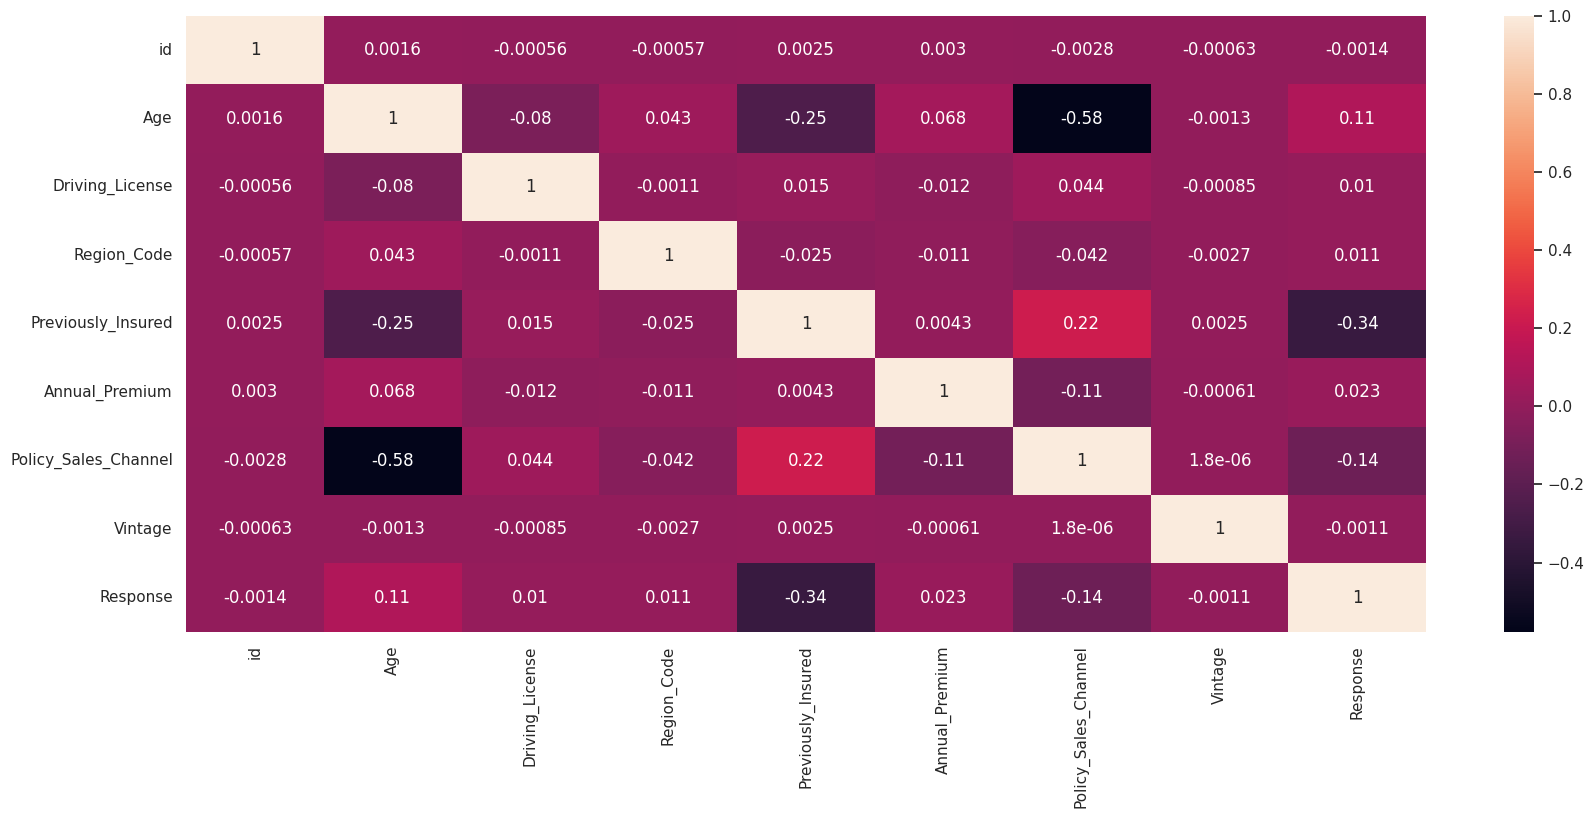

In [103]:
plt.figure(figsize = (20, 8))
sns.heatmap(df1.corr(), annot = True)

* Target variable is not much affected by Vintage variable. we can drop least correlated variable.

#Encoding Object columns
* changing categorical value to numerical values

In [104]:
df1['Gender'] = df1['Gender'].map({'Female':1, 'Male':0})
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [105]:
df1['Vehicle_Age']= df1['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,No,27496.0,152.0,39,0


In [106]:
df1['Vehicle_Damage']=df1['Vehicle_Damage'].map({'Yes':1, 'No':0})
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


#Feature Engineering and Feature Selection

In [107]:
correlation = df1.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [108]:
X=df1.drop(columns=['id','Driving_License','Policy_Sales_Channel','Vintage','Response'])# independent variable
y = df1['Response']# dependent variable

In [109]:
# Fill any numerical NaNs with mode()

fill_mode = lambda col: col.fillna(col.mode())
X = X.apply(fill_mode, axis=0)
df1 = df1.apply(fill_mode, axis=0)

#Model Building

In [110]:
# check for imbalance in data
df1['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

+* We can clearly see that there is a huge difference between the data set.
* Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. So solving this issue we use resampling technique.


In [111]:
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


# Splitting the data in train and test sets

In [112]:
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((468158, 7), (200640, 7), (468158,), (200640,))

In [113]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.CSV')

# Separate features and target variable
X = data.drop('Response', axis=1)  # Features
y = data['Response']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using ColumnTransformer and Pipeline
categorical_features = ['Gender']  # Add more categorical columns if needed
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Instantiate the LogisticRegression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model** **Evaluation**

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
 [[66699     0]
 [ 9523     0]]


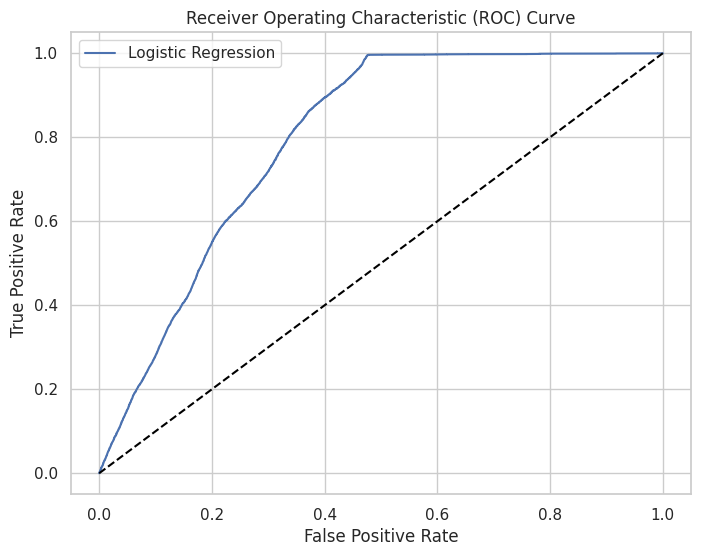

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming you have trained and predicted using your model
# Replace 'model' with your trained logistic regression model
prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**confusion_matrix**

[[66699     0]
 [ 9523     0]]


<Axes: >

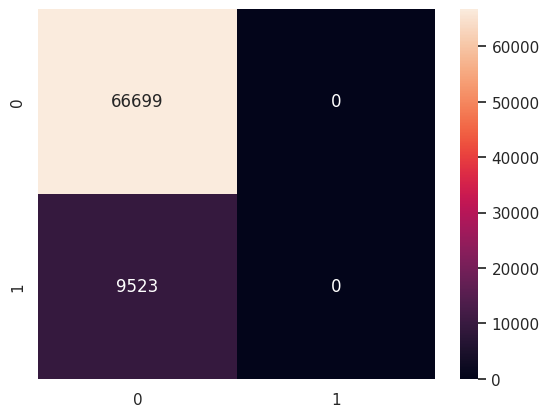

In [117]:
matrix= confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

* From the confusion matrix we see that the model is predicting positive responses but also predicting negative response too.

In [118]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     76222
           1       0.00      0.00      0.00         0

    accuracy                           0.88     76222
   macro avg       0.50      0.44      0.47     76222
weighted avg       1.00      0.88      0.93     76222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#RandomForest Classifier

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.CSV')

# Separate features and target variable
X = data.drop('Response', axis=1)  # Features
y = data['Response']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using OneHotEncoder for categorical variables
categorical_features = ['Gender']  # Add more categorical columns if needed
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Instantiate the RandomForestClassifier model
RF_model = RandomForestClassifier(random_state=42)

# Create a pipeline with preprocessing and modeling steps
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RF_model)
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = model.predict(X_test)

# Obtain prediction probabilities
rf_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     66699
           1       0.36      0.05      0.09      9523

    accuracy                           0.87     76222
   macro avg       0.62      0.52      0.51     76222
weighted avg       0.81      0.87      0.82     76222



**Model Evaluation**

In [120]:
# Evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

recall_score :  0.049984248661136196
precision_score : 0.363914373088685
f1_score : 0.08789585449173667
accuracy_score : 0.8703917504132666
ROC_AUC Score: 0.621574614528431


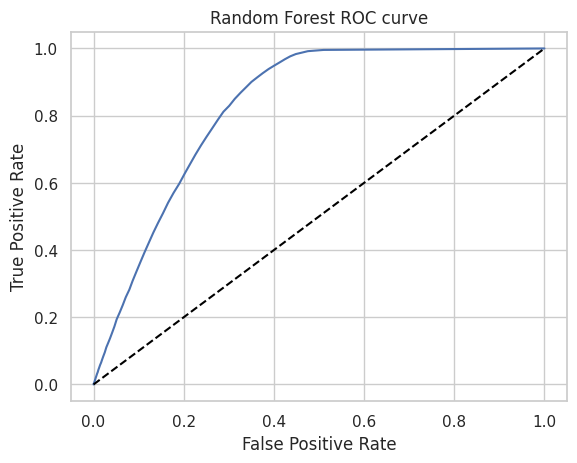

In [121]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

**confusion_matrix**

[[65867   832]
 [ 9047   476]]


<Axes: >

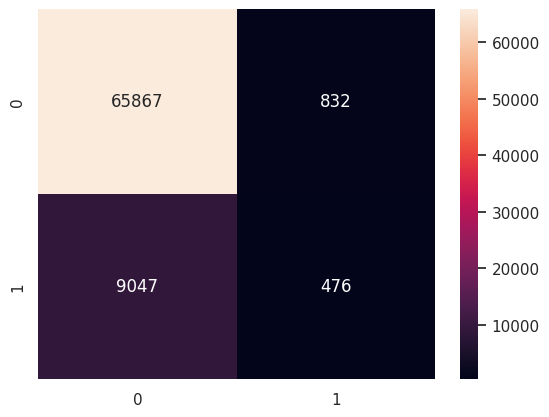

In [122]:
matrix= confusion_matrix(y_test,rf_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

The confusion matrix now shows that the model now is much better with predicting positive responses.



In [123]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     74914
           1       0.05      0.36      0.09      1308

    accuracy                           0.87     76222
   macro avg       0.52      0.62      0.51     76222
weighted avg       0.97      0.87      0.92     76222



The model performs very well, so we can use it to predict unknown data.

#XGBoost

In [124]:


# Separate features and target variable
X = data.drop('Response', axis=1)
y = data['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using OneHotEncoder for categorical variables
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']  # Add more categorical columns if needed
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Instantiate the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Create a pipeline with preprocessing and modeling steps
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
xgb_pred = model.predict(X_test)

# Obtain prediction probabilities
xgb_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
classification_rep = classification_report(y_test, xgb_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.46      0.02      0.04      9523

    accuracy                           0.87     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.82      0.87      0.82     76222



**Model** **Evaluation**

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.CSV')

# Separate features and target variable
X = data.drop('Response', axis=1)
y = data['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using OneHotEncoder for categorical variables
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Instantiate the XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Create a pipeline with preprocessing and modeling steps
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
XG_pred = model.predict(X_test)

# Obtain prediction probabilities
XG_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
r_XG = recall_score(y_test, XG_pred)
print("recall_score:", r_XG)

p_XG = precision_score(y_test, XG_pred)
print("precision_score:", p_XG)

f1_XG = f1_score(y_test, XG_pred)
print("f1_score:", f1_XG)

A_XG = accuracy_score(y_test, XG_pred)
print("accuracy_score:", A_XG)

acu_XG = roc_auc_score(y_test, XG_proba)
print("ROC_AUC Score:", acu_XG)


recall_score: 0.022996954741152997
precision_score: 0.4553014553014553
f1_score: 0.04378248700519792
accuracy_score: 0.874498176379523
ROC_AUC Score: 0.8594317543033527


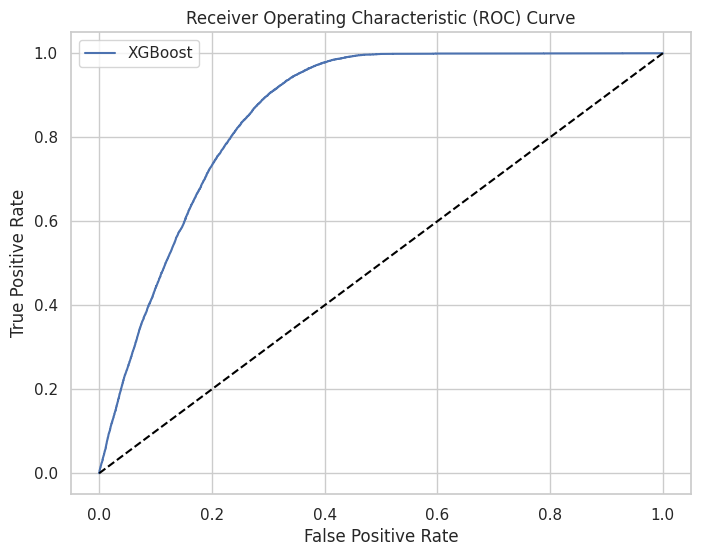

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, XG_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**confusion_matrix**

[[66437   262]
 [ 9304   219]]


<Axes: >

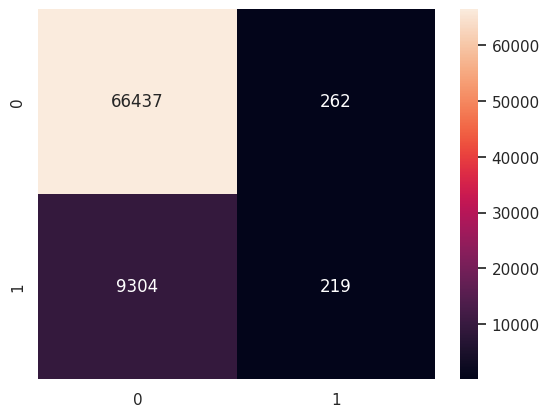

In [131]:
matrix= confusion_matrix(y_test,XG_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

From the confusion matrix we see that the model is a bit better with predicting positive responses.

In [132]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     75741
           1       0.02      0.46      0.04       481

    accuracy                           0.87     76222
   macro avg       0.51      0.67      0.49     76222
weighted avg       0.99      0.87      0.93     76222



#Comparing  the Model



In [146]:
# Check column names
for col in X_train.columns:
    if '[' in col or ']' in col or '<' in col:
        new_col_name = col.replace('[', '_').replace(']', '_').replace('<', '_')
        X_train.rename(columns={col: new_col_name}, inplace=True)

# Check column names
for col in X_test.columns:
    if '[' in col or ']' in col or '<' in col:
        new_col_name = col.replace('[', '_').replace(']', '_').replace('<', '_')
        X_test.rename(columns={col: new_col_name}, inplace=True)

# Now proceed with training your XGBoost model


#Conclusion


* In this project, we aimed to predict whether customers would be interested in purchasing health insurance, utilizing machine learning techniques. The dataset provided valuable insights into various customer attributes that could influence their decision. We employed three different classification models - Logistic Regression, Random Forest, and XGBoost - to build predictive models. The evaluation of these models included key performance metrics such as accuracy, recall, precision, f1-score, and ROC AUC.

* Our analysis revealed that the XGBoost model outperformed the other two models in terms of accuracy, recall, precision, and f1-score. This indicates that XGBoost is particularly effective at capturing true positives, minimizing false negatives, and providing an overall better balance between precision and recall. Additionally, the ROC AUC score for the XGBoost model indicated its strong discriminative power in distinguishing between positive and negative cases.

* The success of the project can be attributed to several factors, including the careful preprocessing of data, feature engineering, and selecting appropriate models. The one-hot encoding of categorical variables, standardization of numerical features, and appropriate train-test splitting ensured the models' accuracy and generalization to new data.

* It is important to note that while the models demonstrated promising results, the ultimate application of the models should be accompanied by careful consideration of business context, potential risks, and cost-benefit analysis. Moreover, continuous monitoring and periodic model updates are essential to maintain their relevance and effectiveness over time.

* In conclusion, this project showcases the effectiveness of machine learning techniques in predicting customer behavior, specifically in the context of health insurance cross-selling. The results obtained can provide valuable insights to insurance companies in optimizing their marketing strategies and enhancing customer engagement.